In [1]:
#ASSIGNMENT 2

In [2]:
#1. Load library & dataset
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import normalized_mutual_info_score
from scipy.stats import entropy

In [3]:
data_price_demand = pd.read_csv('price_and_demand.csv', header=None)
data_weather = pd.read_csv('weather.csv', encoding= 'unicode_escape')

## 1. DATA CLEANING ##

In [4]:
#1.1 data_price_demand

In [5]:
display(data_price_demand.head())

,0,1,2,3,4
0,VIC1,1/11/2022 0:30,"4,178.18",8.94,TRADE
1,VIC1,1/11/2022 1:00,"4,086.02",0.14,TRADE
2,VIC1,1/11/2022 1:30,"4,033.37",0.02,TRADE
3,VIC1,1/11/2022 2:00,"3,985.64",0.00,TRADE
4,VIC1,1/11/2022 2:30,"3,885.64",0.02,TRADE


In [6]:
# Add header name to the dataframe:
header_names = ['State', 'Date_Time', 'Demand (MW)', 'Price', 'Trade_Status']
data_price_demand.columns = header_names

In [7]:
# Check for missing value
print(data_price_demand.isnull().sum())

State           0
Date_Time       0
Demand (MW)     0
Price           0
Trade_Status    0
dtype: int64


In [8]:
# Unique values in each columns:
for column in data_price_demand.columns:
    unique_values = data_price_demand[column].unique()
    print(f"'{column}': {unique_values}")

'State': ['VIC1']
'Date_Time': ['1/11/2022 0:30' '1/11/2022 1:00' '1/11/2022 1:30' ... '23/04/2023 23:00'
 '23/04/2023 23:30' '24/04/2023 0:00']
'Demand (MW)': ['4,178.18' '4,086.02' '4,033.37' ... '4,472.49' '4,621.36' '4,395.96']
'Price': [8.940e+00 1.400e-01 2.000e-02 ... 8.125e+01 9.397e+01 8.396e+01]
'Trade_Status': ['TRADE']


In [9]:
print(data_price_demand.dtypes)

State            object
Date_Time        object
Demand (MW)      object
Price           float64
Trade_Status     object
dtype: object


In [10]:
# Convert the date column to a datetime data type
data_price_demand['Date_Time'] = pd.to_datetime(data_price_demand['Date_Time'], format='%d/%m/%Y %H:%M')

In [11]:
# Convert the Demand column to float
data_price_demand['Demand (MW)'] = data_price_demand['Demand (MW)'].str.replace(',', '').astype(float)

In [12]:
# Re-examine datatype:
print(data_price_demand.dtypes)

State                   object
Date_Time       datetime64[ns]
Demand (MW)            float64
Price                  float64
Trade_Status            object
dtype: object


In [13]:
#All states are VICTORIA in TRADE type.
#Calculate total demand for each day:
data_price_demand['Date'] = data_price_demand['Date_Time'].dt.date # Extract only the date from the datetime

In [14]:
print(data_price_demand['Date'])

0       2022-11-01
1       2022-11-01
2       2022-11-01
3       2022-11-01
4       2022-11-01
           ...    
8347    2023-04-23
8348    2023-04-23
8349    2023-04-23
8350    2023-04-23
8351    2023-04-24
Name: Date, Length: 8352, dtype: object


In [15]:
sum_of_demand = data_price_demand.groupby('Date')['Demand (MW)'].sum().round(2)

In [16]:
print(sum_of_demand)

Date
2022-11-01    207429.46
2022-11-02    233630.93
2022-11-03    235672.34
2022-11-04    224895.28
2022-11-05    189190.35
                ...    
2023-04-20    227925.10
2023-04-21    232043.13
2023-04-22    207431.82
2023-04-23    195560.35
2023-04-24      4395.96
Name: Demand (MW), Length: 175, dtype: float64


In [17]:
daily_demand_df = sum_of_demand.reset_index()

In [18]:
#Create a new dataframe with date and sum of demand:
print(daily_demand_df)

           Date  Demand (MW)
0    2022-11-01    207429.46
1    2022-11-02    233630.93
2    2022-11-03    235672.34
3    2022-11-04    224895.28
4    2022-11-05    189190.35
..          ...          ...
170  2023-04-20    227925.10
171  2023-04-21    232043.13
172  2023-04-22    207431.82
173  2023-04-23    195560.35
174  2023-04-24      4395.96

[175 rows x 2 columns]


In [19]:
print(daily_demand_df.dtypes)

Date            object
Demand (MW)    float64
dtype: object


In [20]:
#Convert Date to datetime
daily_demand_df['Date'] = pd.to_datetime(daily_demand_df['Date'])

In [21]:
print(daily_demand_df.dtypes)

Date           datetime64[ns]
Demand (MW)           float64
dtype: object


In [22]:
daily_demand_df.to_csv("daily_demand_df.csv", index=False)

In [23]:
daily_demand_df

,Date,Demand (MW)
0,2022-11-01,207429.46
1,2022-11-02,233630.93
2,2022-11-03,235672.34
3,2022-11-04,224895.28
4,2022-11-05,189190.35
...,...,...
170,2023-04-20,227925.10
171,2023-04-21,232043.13
172,2023-04-22,207431.82
173,2023-04-23,195560.35


In [24]:
#1.2 Clean the weather dataset

In [25]:
display(data_weather)

,Location,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,...,9am cloud amount (oktas),9am wind direction,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa)
0,"Melbourne (Olympic Park), Victoria",1/11/2022,8.5,13.3,3.0,NaN,NaN,SW,44.0,11:36,...,NaN,NW,13,991.3,13.2,59.0,NaN,WNW,11.0,991.5
1,"Melbourne (Olympic Park), Victoria",2/11/2022,6.9,15.7,2.8,NaN,NaN,SSW,43.0,11:33,...,NaN,W,9,1006.7,15.1,54.0,NaN,SSW,13.0,1008.4
2,"Melbourne (Olympic Park), Victoria",3/11/2022,9.1,15.4,0.4,NaN,NaN,SSW,31.0,8:07,...,NaN,SSW,9,1019.2,13.8,67.0,NaN,SSW,9.0,1021.3
3,"Melbourne (Olympic Park), Victoria",4/11/2022,10.2,17.8,0.2,NaN,NaN,S,24.0,14:50,...,NaN,WSW,6,1028.1,16.9,56.0,NaN,SW,9.0,1026.6
4,"Melbourne (Olympic Park), Victoria",5/11/2022,11.8,22.7,0.0,NaN,NaN,N,31.0,11:58,...,NaN,N,9,1026.3,18.8,65.0,NaN,SW,11.0,1023.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,"Melbourne (Olympic Park), Victoria",20/04/2023,7.8,18.5,0.0,NaN,NaN,SSW,17.0,12:47,...,NaN,NNE,7,1026.8,17.5,58.0,NaN,SW,4.0,1025.5
171,"Melbourne (Olympic Park), Victoria",21/04/2023,11.3,19.0,0.0,NaN,NaN,SSW,13.0,10:48,...,NaN,NE,6,1030.5,18.6,64.0,NaN,SSE,2.0,1029.2
172,"Melbourne (Olympic Park), Victoria",22/04/2023,14.6,19.2,0.0,NaN,NaN,SSW,22.0,16:09,...,NaN,SW,6,1031.9,18.8,64.0,NaN,SSW,11.0,1029.7
173,"Melbourne (Olympic Park), Victoria",23/04/2023,14.8,19.0,0.0,NaN,NaN,SSW,26.0,15:45,...,NaN,SSE,7,1034.4,17.8,71.0,NaN,SSW,13.0,1032.4


In [26]:
data_weather.shape

(175, 22)

In [27]:
print(data_weather.isnull().sum())

Location                               0
Date                                   0
Minimum temperature (°C)               0
Maximum temperature (°C)               1
Rainfall (mm)                          0
Evaporation (mm)                     175
Sunshine (hours)                     175
Direction of maximum wind gust         1
Speed of maximum wind gust (km/h)      1
Time of maximum wind gust              1
9am Temperature (°C)                   0
9am relative humidity (%)              0
9am cloud amount (oktas)             175
9am wind direction                     0
9am wind speed (km/h)                  0
9am MSL pressure (hPa)                 0
3pm Temperature (°C)                   1
3pm relative humidity (%)              1
3pm cloud amount (oktas)             175
3pm wind direction                     1
3pm wind speed (km/h)                  1
3pm MSL pressure (hPa)                 1
dtype: int64


In [28]:
#Drop empty columns
data_weather.drop(columns=['Evaporation (mm)', 
                           'Sunshine (hours)', 
                           '9am cloud amount (oktas)', 
                           '3pm cloud amount (oktas)'], inplace=True)

In [29]:
# DELETE Location as we know that all location values are Victoria                          
# DELETE Direction of maximum wind gust       
# DELETE Time of maximum wind gust            
# DELETE 9am wind direction
# DELETE 3pm wind direction

In [30]:
data_weather.drop(columns=['Location', 
                           'Direction of maximum wind gust ', 
                           'Time of maximum wind gust', 
                           '9am wind direction', 
                           '3pm wind direction'], inplace=True)

In [31]:
print(data_weather.dtypes)

Date                                  object
Minimum temperature (°C)             float64
Maximum temperature (°C)             float64
Rainfall (mm)                        float64
Speed of maximum wind gust (km/h)    float64
9am Temperature (°C)                 float64
9am relative humidity (%)              int64
9am wind speed (km/h)                 object
9am MSL pressure (hPa)               float64
3pm Temperature (°C)                 float64
3pm relative humidity (%)            float64
3pm wind speed (km/h)                float64
3pm MSL pressure (hPa)               float64
dtype: object


In [32]:
# Date need to be converted into date_time

In [33]:
# Convert date into date_time
data_weather['Date'] = pd.to_datetime(data_weather['Date'], format='%d/%m/%Y')

In [34]:
print(data_weather.dtypes)

Date                                 datetime64[ns]
Minimum temperature (°C)                    float64
Maximum temperature (°C)                    float64
Rainfall (mm)                               float64
Speed of maximum wind gust (km/h)           float64
9am Temperature (°C)                        float64
9am relative humidity (%)                     int64
9am wind speed (km/h)                        object
9am MSL pressure (hPa)                      float64
3pm Temperature (°C)                        float64
3pm relative humidity (%)                   float64
3pm wind speed (km/h)                       float64
3pm MSL pressure (hPa)                      float64
dtype: object


In [35]:
data_weather.head()

,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Speed of maximum wind gust (km/h),9am Temperature (°C),9am relative humidity (%),9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm wind speed (km/h),3pm MSL pressure (hPa)
0,2022-11-01,8.5,13.3,3.0,44.0,12.0,64,13,991.3,13.2,59.0,11.0,991.5
1,2022-11-02,6.9,15.7,2.8,43.0,11.0,65,9,1006.7,15.1,54.0,13.0,1008.4
2,2022-11-03,9.1,15.4,0.4,31.0,11.5,70,9,1019.2,13.8,67.0,9.0,1021.3
3,2022-11-04,10.2,17.8,0.2,24.0,12.3,84,6,1028.1,16.9,56.0,9.0,1026.6
4,2022-11-05,11.8,22.7,0.0,31.0,14.0,78,9,1026.3,18.8,65.0,11.0,1023.2


In [36]:
# 9am wind speed (km/h) needs to be changed into int, inspect the columns for better understanding
value_counts = data_weather['9am wind speed (km/h)'].value_counts()
print(value_counts)

9       40
7       35
13      21
11      17
6       17
15      10
Calm     9
4        8
17       5
2        4
20       3
19       3
22       2
24       1
Name: 9am wind speed (km/h), dtype: int64


In [37]:
#As calm == 0 windspeed, replace Calm with 0:
data_weather['9am wind speed (km/h)'] = data_weather['9am wind speed (km/h)'].replace('Calm', 0)

In [38]:
#Examine the column again
value_counts = data_weather['9am wind speed (km/h)'].value_counts()
print(value_counts)

9     40
7     35
13    21
11    17
6     17
15    10
0      9
4      8
17     5
2      4
20     3
19     3
22     2
24     1
Name: 9am wind speed (km/h), dtype: int64


In [39]:
print(data_weather.dtypes)

Date                                 datetime64[ns]
Minimum temperature (°C)                    float64
Maximum temperature (°C)                    float64
Rainfall (mm)                               float64
Speed of maximum wind gust (km/h)           float64
9am Temperature (°C)                        float64
9am relative humidity (%)                     int64
9am wind speed (km/h)                        object
9am MSL pressure (hPa)                      float64
3pm Temperature (°C)                        float64
3pm relative humidity (%)                   float64
3pm wind speed (km/h)                       float64
3pm MSL pressure (hPa)                      float64
dtype: object


In [40]:
# Change the column into int:
data_weather['9am wind speed (km/h)'] = data_weather['9am wind speed (km/h)'].astype(int)

In [41]:
#Check if we change it successfully
print(data_weather.dtypes)

Date                                 datetime64[ns]
Minimum temperature (°C)                    float64
Maximum temperature (°C)                    float64
Rainfall (mm)                               float64
Speed of maximum wind gust (km/h)           float64
9am Temperature (°C)                        float64
9am relative humidity (%)                     int64
9am wind speed (km/h)                         int64
9am MSL pressure (hPa)                      float64
3pm Temperature (°C)                        float64
3pm relative humidity (%)                   float64
3pm wind speed (km/h)                       float64
3pm MSL pressure (hPa)                      float64
dtype: object


In [42]:
#Examine data frame again
print(data_weather.isnull().sum())

Date                                 0
Minimum temperature (°C)             0
Maximum temperature (°C)             1
Rainfall (mm)                        0
Speed of maximum wind gust (km/h)    1
9am Temperature (°C)                 0
9am relative humidity (%)            0
9am wind speed (km/h)                0
9am MSL pressure (hPa)               0
3pm Temperature (°C)                 1
3pm relative humidity (%)            1
3pm wind speed (km/h)                1
3pm MSL pressure (hPa)               1
dtype: int64


In [43]:
# Where is the missing data?
null_values = data_weather.isnull()
rows_with_null = data_weather[null_values.any(axis=1)]
print(rows_with_null)

          Date  Minimum temperature (°C)  Maximum temperature (°C)  \
174 2023-04-24                      11.0                       NaN   

     Rainfall (mm)  Speed of maximum wind gust (km/h)  9am Temperature (°C)  \
174            0.0                                NaN                  14.3   

     9am relative humidity (%)  9am wind speed (km/h)  9am MSL pressure (hPa)  \
174                         87                      9                  1032.5   

     3pm Temperature (°C)  3pm relative humidity (%)  3pm wind speed (km/h)  \
174                   NaN                        NaN                    NaN   

     3pm MSL pressure (hPa)  
174                     NaN  


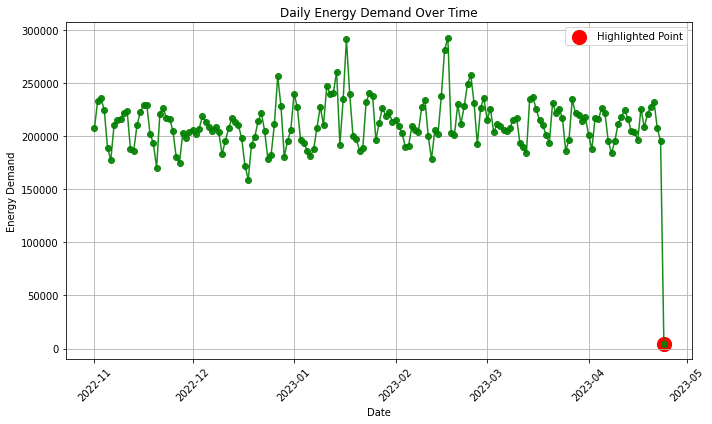

In [44]:
# Inspect the Demand dataset to examine the data on 24.04.23
plt.figure(figsize=(10, 6))
plt.plot(daily_demand_df['Date'], daily_demand_df['Demand (MW)'], marker='o', linestyle='-', color='g', alpha = 0.9)
plt.scatter(daily_demand_df.loc[174, 'Date'], daily_demand_df.loc[174, 'Demand (MW)'], color='r', s=200, label='Highlighted Point')
plt.title('Daily Energy Demand Over Time')
plt.xlabel('Date')
plt.ylabel('Energy Demand')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [45]:
# As highlighted, the datapoint on the 24.04.23 is also an outliner on the Demand dataset, so we decided to drop the datapoint.
# Drop data row with missing data. 
data_weather.drop(174, inplace=True)

In [46]:
# Re-examine the data frame 
print(data_weather.isnull().sum())

Date                                 0
Minimum temperature (°C)             0
Maximum temperature (°C)             0
Rainfall (mm)                        0
Speed of maximum wind gust (km/h)    0
9am Temperature (°C)                 0
9am relative humidity (%)            0
9am wind speed (km/h)                0
9am MSL pressure (hPa)               0
3pm Temperature (°C)                 0
3pm relative humidity (%)            0
3pm wind speed (km/h)                0
3pm MSL pressure (hPa)               0
dtype: int64


In [47]:
# Check that the row has been dropped
data_weather.shape

(174, 13)

In [48]:
#Merge 2 dataset on Date column:
weather_demand_df = pd.merge(data_weather, daily_demand_df, how='left', on='Date')

In [49]:
weather_demand_df.head()

,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Speed of maximum wind gust (km/h),9am Temperature (°C),9am relative humidity (%),9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm wind speed (km/h),3pm MSL pressure (hPa),Demand (MW)
0,2022-11-01,8.5,13.3,3.0,44.0,12.0,64,13,991.3,13.2,59.0,11.0,991.5,207429.46
1,2022-11-02,6.9,15.7,2.8,43.0,11.0,65,9,1006.7,15.1,54.0,13.0,1008.4,233630.93
2,2022-11-03,9.1,15.4,0.4,31.0,11.5,70,9,1019.2,13.8,67.0,9.0,1021.3,235672.34
3,2022-11-04,10.2,17.8,0.2,24.0,12.3,84,6,1028.1,16.9,56.0,9.0,1026.6,224895.28
4,2022-11-05,11.8,22.7,0.0,31.0,14.0,78,9,1026.3,18.8,65.0,11.0,1023.2,189190.35


In [50]:
print(weather_demand_df.dtypes)

Date                                 datetime64[ns]
Minimum temperature (°C)                    float64
Maximum temperature (°C)                    float64
Rainfall (mm)                               float64
Speed of maximum wind gust (km/h)           float64
9am Temperature (°C)                        float64
9am relative humidity (%)                     int64
9am wind speed (km/h)                         int64
9am MSL pressure (hPa)                      float64
3pm Temperature (°C)                        float64
3pm relative humidity (%)                   float64
3pm wind speed (km/h)                       float64
3pm MSL pressure (hPa)                      float64
Demand (MW)                                 float64
dtype: object


In [52]:
print(weather_demand_df.isnull().sum())

Date                                 0
Minimum temperature (°C)             0
Maximum temperature (°C)             0
Rainfall (mm)                        0
Speed of maximum wind gust (km/h)    0
9am Temperature (°C)                 0
9am relative humidity (%)            0
9am wind speed (km/h)                0
9am MSL pressure (hPa)               0
3pm Temperature (°C)                 0
3pm relative humidity (%)            0
3pm wind speed (km/h)                0
3pm MSL pressure (hPa)               0
Demand (MW)                          0
dtype: int64


In [ ]:
weather_demand_df.to_csv('weather_demand_df.csv', index=False)

## 2. DATA EXPLORATION ##

### 2.1. PRICING AND DEMAND ###

In [71]:
# Calculate 24-hour moving average for 'Price'
data_price_demand['Price_MA_24'] = data_price_demand['Price'].rolling(window=24).mean()

# Calculate 24-hour moving average for 'Demand'
data_price_demand['Demand_MA_24'] = data_price_demand['Demand (MW)'].rolling(window=24).mean()

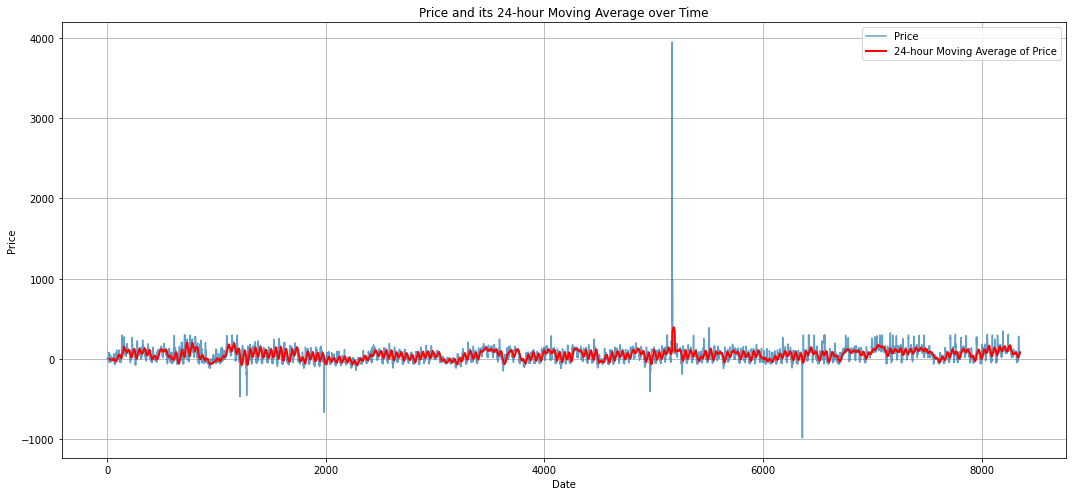

In [72]:
# Plotting the 'Price' and 'Price_MA_24' over time

plt.figure(figsize=(15, 7))
data_price_demand['Price'].plot(label='Price', alpha=0.7)
data_price_demand['Price_MA_24'].plot(label='24-hour Moving Average of Price', color='red', linewidth=2)
plt.title('Price and its 24-hour Moving Average over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

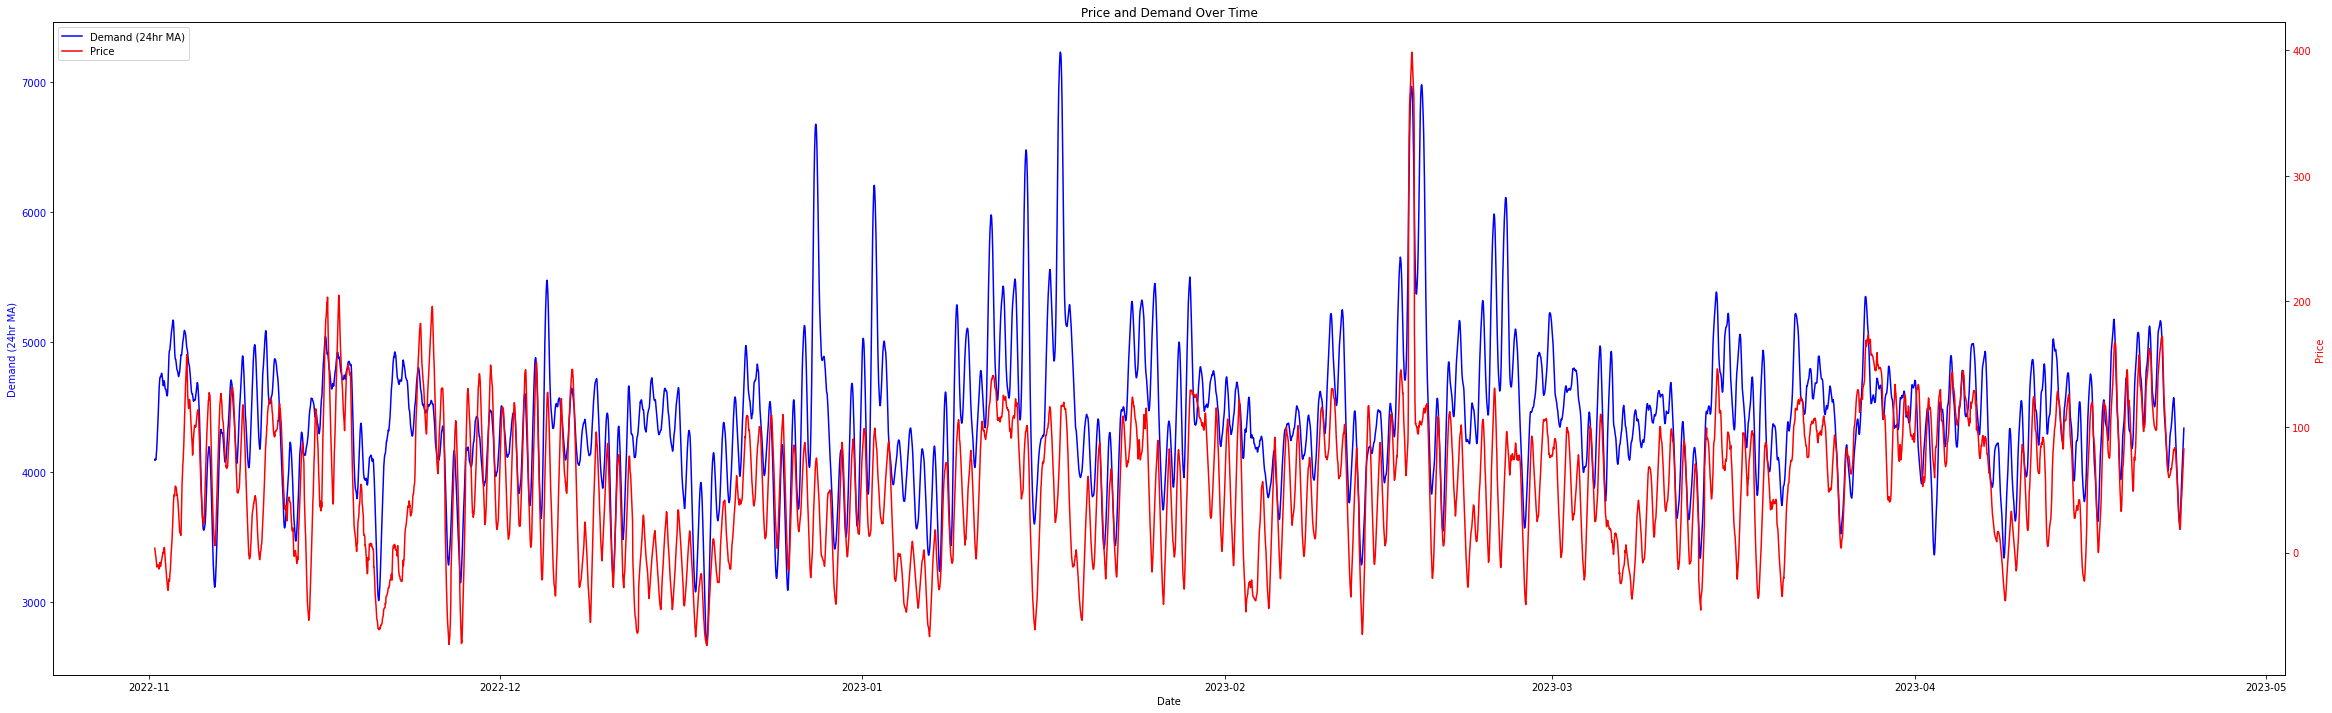

In [73]:
# Plotting Price and Demand over 30 minutes window

# Create a figure and axis object
fig, ax1 = plt.subplots(figsize=(40, 12))

# Plot demand using the first y-axis (left)
ax1.plot(data_price_demand['Date_Time'], data_price_demand['Demand_MA_24'], color='b', label='Demand (24hr MA)')
ax1.set_xlabel('Date')
ax1.set_ylabel('Demand (24hr MA)', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create a secondary y-axis for price
ax2 = ax1.twinx()
ax2.plot(data_price_demand['Date_Time'], data_price_demand['Price_MA_24'], color='r', label='Price')
ax2.set_ylabel('Price', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Combine the legends from both axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

# Set a title for the combined plot
plt.title('Price and Demand Over Time')

# Display the plot
plt.show()

In [75]:
#Outliner detection:
max_price_index = data_price_demand['Price'].idxmax()
print(max_price_index)

5169


In [76]:
max_price_row = data_price_demand.loc[5169]

In [77]:
display(max_price_row)

State                          VIC1
Date_Time       2023-02-16 17:00:00
Demand (MW)                 8386.17
Price                       3944.96
Trade_Status                  TRADE
Date                     2023-02-16
Price_MA_24                 279.376
Demand_24H                  6042.79
Demand_MA_24                6042.79
Name: 5169, dtype: object

In [79]:
#Inspect the weather dataset for insight:
desired_date = '2023-02-16'
row_with_desired_date = weather_demand_df[weather_demand_df['Date'] == desired_date]
display(row_with_desired_date)

,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Speed of maximum wind gust (km/h),9am Temperature (°C),9am relative humidity (%),9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm wind speed (km/h),3pm MSL pressure (hPa),Demand (MW),Average_Temperature (°C)_9am_3pm,Average_relative humidity (%)_9am_3pm,Average_wind speed (km/h)_9am_3pm,Average_MSL pressure (hPa)_9am_3pm
107,2023-02-16,17.1,37.2,0.0,33.0,23.1,55,9,1013.3,35.4,24.0,7.0,1010.3,281608.67,29.25,39.5,8.0,1011.8


### Possible reasons ###
1. Hot temperatures of around 37.2°C drove high demand

In [88]:
min_value_temp = weather_demand_df['Maximum temperature (°C)'].min()
max_value_temp = weather_demand_df['Maximum temperature (°C)'].max()
print(min_value_temp,max_value_temp)

13.1 40.5


2. Extremely low output from wind generation (9km/h) reduced the amount of low-priced capacity available because wind is typically offered at negative prices. Inspection of win speed column confirms the assumption

In [ ]:
min_value = weather_demand_df['9am wind speed (km/h)'].min()
max_value = weather_demand_df['9am wind speed (km/h)'].max()
min_value_3pm = weather_demand_df['3pm wind speed (km/h)'].min()
max_value_3pm = weather_demand_df['3pm wind speed (km/h)'].max()

In [85]:
print(min_value, max_value)

0 24


In [86]:
print(min_value_3pm, max_value_3pm)

2.0 28.0


3. Other possible reasons are mentioned in the report